# dealing with null values 

here are the applied stpes:
    
1- dropping useless columns ['id', 'url', 'region_url', 'county', 'size', 'image_url', 'description']

2- dropping useless rows where nulls cann't be populated

3- populating related columns on each others
    'manufacturer' & 'model'
    
4- populating 
    ['type' , 'drive'] on 'model'
    'cylinders' on 'type'
    'condition' on 'year'
    
5- filling columns with small number of nulls with mode or mean values
    ['Fuel', 'title_status', 'transmission', 'odometer', 'paint_color']
    
6- removing outliers from the 'year' column

7- dropping nulls from ['lat', 'long', 'year'] 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# uploading the dataset
data = pd.read_csv(r"C:\Users\m\Downloads\excel files\vehicles.csv")

In [3]:
data.shape

(426880, 26)

In [152]:
# it took a lot of time working with the 400k rows of data so 100K would be more effective

df = data.sample(100000)

# Overview

In [143]:
pd.set_option('display.max_column', None)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
338395,7316859609,https://poconos.craigslist.org/ctd/d/pocono-pi...,poconos,https://poconos.craigslist.org,31590,2020.0,ford,ranger supercrew xlt pickup,good,NaN,gas,16279.0,clean,other,1FTER4EH1LLA41192,NaN,NaN,pickup,white,https://images.craigslist.org/01212_ccL55Zq0zd...,Carvana is the safer way to buy a car During t...,NaN,pa,41.110000,-75.450000,2021-05-04T14:41:04-0400
17826,7309854048,https://fayar.craigslist.org/ctd/d/2021-chinoo...,fayetteville,https://fayar.craigslist.org,16900,2021.0,NaN,CHINOOK DREAM 175BH,NaN,NaN,gas,0.0,clean,automatic,7KXBT2119MP020230,NaN,NaN,NaN,white,https://images.craigslist.org/00F0F_hDKyAx42z2...,2021 CHINOOK DREAM 175BH 21FT TRAVEL TRAILER ...,NaN,ar,NaN,NaN,2021-04-20T11:19:23-0500
316904,7313701209,https://eugene.craigslist.org/ctd/d/gladstone-...,eugene,https://eugene.craigslist.org,38990,2010.0,ram,NaN,NaN,NaN,diesel,93244.0,clean,automatic,3D7UT2CL1AG158148,4wd,NaN,pickup,NaN,https://images.craigslist.org/00g0g_gKM5H46JXZ...,2010 Dodge Ram 2500 SLT BIGHORN 4X4/ 6.7L CUMM...,NaN,or,45.382346,-122.605132,2021-04-27T21:37:28-0700
300703,7314610164,https://wheeling.craigslist.org/ctd/d/wheeling...,northern panhandle,https://wheeling.craigslist.org,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,https://images.craigslist.org/01313_9Zne268YnW...,Carvana is the safer way to buy a car During t...,NaN,oh,40.070000,-80.690000,2021-04-29T20:11:48-0400
158389,7306906848,https://desmoines.craigslist.org/ctd/d/south-a...,des moines,https://desmoines.craigslist.org,51990,2013.0,ram,5500,good,NaN,diesel,129633.0,clean,other,3C7WRMALXDG588249,rwd,full-size,truck,white,https://images.craigslist.org/00b0b_h5mvAEREFj...,2013 RAM 5500 42 FOOT ARTICULATING BUCKET TRUC...,NaN,ia,40.468785,-74.281707,2021-04-14T16:30:12-0500


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 201519 to 70456
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            100000 non-null  int64  
 1   url           100000 non-null  object 
 2   region        100000 non-null  object 
 3   region_url    100000 non-null  object 
 4   price         100000 non-null  int64  
 5   year          99721 non-null   float64
 6   manufacturer  95867 non-null   object 
 7   model         98835 non-null   object 
 8   condition     59356 non-null   object 
 9   cylinders     58181 non-null   object 
 10  fuel          99304 non-null   object 
 11  odometer      99013 non-null   float64
 12  title_status  98120 non-null   object 
 13  transmission  99445 non-null   object 
 14  VIN           62284 non-null   object 
 15  drive         69337 non-null   object 
 16  size          28014 non-null   object 
 17  type          78195 non-null   object 
 18  paint

In [154]:
# evaluating nulls
(df.isnull().sum()/len(df)) * 100

id                0.000
url               0.000
region            0.000
region_url        0.000
price             0.000
year              0.279
manufacturer      4.133
model             1.165
condition        40.644
cylinders        41.819
fuel              0.696
odometer          0.987
title_status      1.880
transmission      0.555
VIN              37.716
drive            30.663
size             71.986
type             21.805
paint_color      30.477
image_url         0.010
description       0.010
county          100.000
state             0.000
lat               1.499
long              1.499
posting_date      0.010
dtype: float64

In [155]:
# searching for unique values
df.nunique()

id              100000
url             100000
region             404
region_url         413
price             8086
year               100
manufacturer        42
model            13734
condition            6
cylinders            8
fuel                 5
odometer         45007
title_status         6
transmission         3
VIN              41446
drive                3
size                 4
type                13
paint_color         12
image_url        74091
description      92590
county               0
state               51
lat              22231
long             22441
posting_date     96962
dtype: int64

In [86]:
# categories
categorical_columns = df[['condition', 'cylinders', 'fuel', 'title_status',
                          'transmission', 'drive', 'type', 'paint_color']]

for column in categorical_columns:
    print(column, ': \n' , df[column].unique(), '\n')

condition : 
 ['excellent' 'good' 'like new' 'fair' 'new' 'salvage'] 

cylinders : 
 ['6 cylinders' '4 cylinders' '8 cylinders' '10 cylinders' '5 cylinders'
 '3 cylinders' 'other' '12 cylinders'] 

fuel : 
 ['gas' 'other' 'hybrid' 'diesel' 'electric'] 

title_status : 
 ['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only'] 

transmission : 
 ['automatic' 'other' 'manual'] 

drive : 
 ['rwd' '4wd' 'fwd'] 

type : 
 ['van' 'wagon' 'coupe' 'sedan' 'truck' 'SUV' 'other' 'pickup' 'mini-van'
 'hatchback' 'convertible' 'offroad' 'bus'] 

paint_color : 
 ['white' 'green' 'custom' 'red' 'brown' 'silver' 'black' 'grey' 'blue'
 'yellow' 'orange' 'purple'] 



# Deleting useless rows & columns

In [156]:
# useless columns
df.drop(['id', 'url', 'region_url', 'county', 'size', 'image_url', 'description'], axis = 1, inplace = True)

In [157]:
# unknow cars
df.dropna(subset = ['manufacturer', 'model'], how = 'all', inplace = True)

In [158]:
# cars with no features
df.dropna(subset = ['condition','cylinders','fuel',
                    'odometer','title_status','transmission',
                    'drive','type'], how = 'all', inplace = True)

In [174]:
df.shape

(93663, 19)

In [160]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

# Manufacturer & Model

In [226]:
# populating 'manufacturer' with the mode value per each 'model'

In [161]:
# unique models
models = df['model'].dropna().unique()

# empty lists to save the result
manufacturer_list = []
model_list = []
models_null_manufacturer = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['manufacturer'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_list.append(model)
        manufacturer_list.append(mode_value.iloc[0])
    else:
        models_null_manufacturer.append(model)
    
print(len(model_list), len(manufacturer_list), len(models_null_manufacturer)) 

11699 11699 2035


In [162]:
# filling nulls
for i in range(min(len(model_list), len(manufacturer_list))):
    df.loc[(df['manufacturer'].isnull()) & (df['model'] == model_list[i]), 'manufacturer'] = manufacturer_list[i]

In [163]:
# checking
print(df['manufacturer'].isnull().sum(), '\n')
print(len(df[df['model'].isin(models_null_manufacturer)]))

3995 

3995


In [164]:
# models_null_manufacturer
df['manufacturer'] = df['manufacturer'].fillna('unknown')

In [165]:
# checking
df['manufacturer'].isnull().sum()

0

In [232]:
# the same process for 'model'

In [166]:
manufacturers = df['manufacturer'].dropna().unique()

# empty lists to save the result
manufacturer_list1 = []
model_list1 = []
manufacturer_null_model = []

for manufacturer in manufacturers:
    # model mode value
    mode_value = df[df['manufacturer'] == manufacturer]['model'].mode()
    
    if not mode_value.empty:
        # assining values to the lists
        model_list1.append(mode_value.iloc[0])
        manufacturer_list1.append(manufacturer)
    else:
        manufacturer_null_model.append(manufacturer)
    
print(len(model_list1), len(manufacturer_list1), len(manufacturer_null_model)) 

42 42 1


In [167]:
for i in range(min(len(model_list1), len(manufacturer_list1))):
    df.loc[(df['model'].isnull()) & (df['manufacturer'] == manufacturer_list1[i]), 'model'] = model_list1[i]

In [168]:
# manufacturer_null_model
df['model'] = df['model'].fillna('unknown')

In [169]:
# checking
df['model'].isnull().sum()

0

# Year

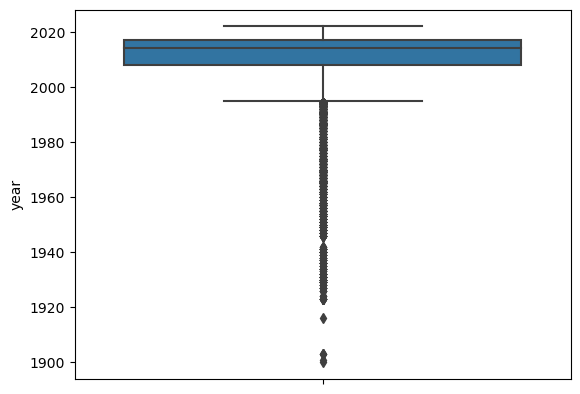

In [170]:
sns.boxplot(y = df['year'])
plt.show()

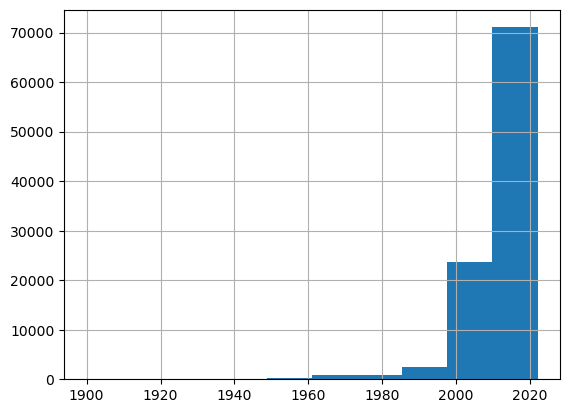

In [171]:
df['year'].hist()
plt.show()

In [172]:
# dropping rows with null years (small number of rows)
df['year'].dropna(inplace = True)

In [173]:
# removing outdated data
df = df[df['year']>=2000]

# Type

In [239]:
df['type'].unique()

array(['hatchback', 'truck', 'pickup', 'sedan', nan, 'SUV', 'convertible',
       'other', 'coupe', 'wagon', 'mini-van', 'van', 'offroad', 'bus'],
      dtype=object)

In [175]:
# empty lists to save the result
typ = []
model_type = []
models_null_type = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['type'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_type.append(model)
        typ.append(mode_value.iloc[0])
    else:
        models_null_type.append(model)
    
print(len(model_type), len(typ), len(models_null_type))  

10302 10302 3432


In [176]:
# filling nulls
for i in range(min(len(model_type), len(typ))):
    df.loc[(df['type'].isnull()) & (df['model'] == model_type[i]), 'type'] = typ[i]

In [177]:
# models_null_type
df['type'].fillna('other', inplace = True)

In [178]:
# checking
df['type'].isnull().sum()

0

# VIN

In [108]:
# making it a binary column

In [179]:
df.loc[df['VIN'].notnull(), 'VIN'] = 1

In [180]:
df['VIN'].fillna(0, inplace = True)

# Drive

In [181]:
df['drive'].unique()

array(['4wd', 'rwd', 'fwd', nan], dtype=object)

In [182]:
# empty lists to save the result
drive = []
model_drive = []
models_null_drive = []

for model in models:
    # manufacturer mode value
    mode_value = df[df['model'] == model]['drive'].mode()
    
    if not mode_value.empty:
        
        # assining values to the lists
        model_drive.append(model)
        drive.append(mode_value.iloc[0])
    else:
        models_null_drive.append(model)
    
print(len(model_drive), len(drive), len(models_null_drive))

9431 9431 4303


In [183]:
# filling nulls
for i in range(min(len(model_drive), len(drive))):
    df.loc[(df['drive'].isnull()) & (df['model'] == model_drive[i]), 'drive'] = drive[i]

In [184]:
df['drive'].isnull().sum()

6260

In [185]:
# models_null_type
df['drive'].fillna(df['drive'].mode().iloc[0], inplace = True)

In [186]:
df['drive'].isnull().sum()

0

# Fuel, title_status, transmission, odometer, paint_color

In [187]:
# filling nulls with the mode values 
for column in df[['fuel', 'title_status', 'transmission']]:
    df[column].fillna(df[column].mode().iloc[0], inplace = True)

In [188]:
# filling with mean value
df['odometer'].fillna(df['odometer'].mean(), inplace = True)

In [189]:
df['paint_color'].fillna('custom', inplace = True)

# Condition

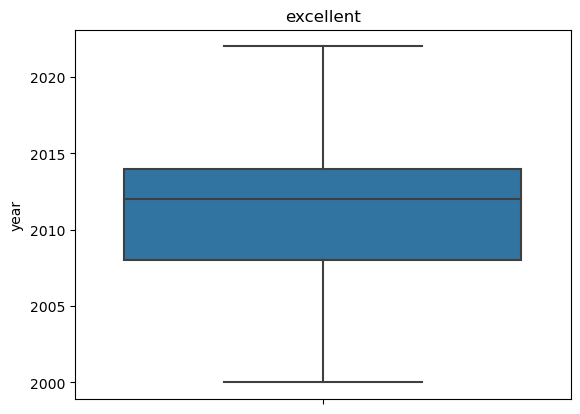

count    43883.000000
mean      2011.545359
std          4.133214
min       2000.000000
25%       2008.000000
50%       2012.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64 



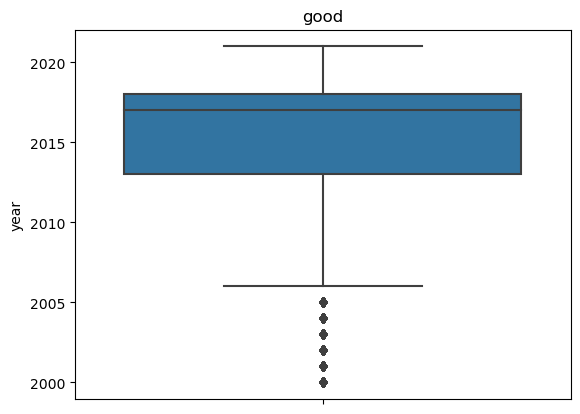

count    42233.000000
mean      2014.644970
std          5.230776
min       2000.000000
25%       2013.000000
50%       2017.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64 



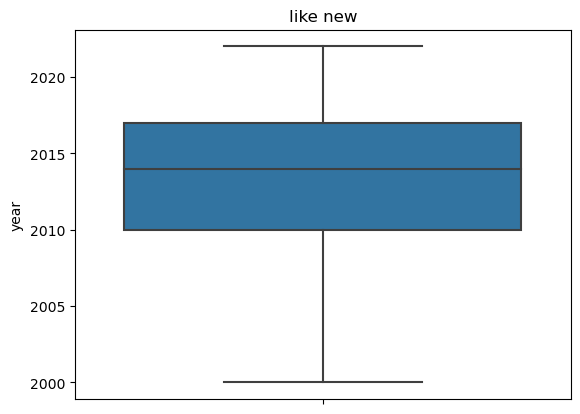

count    4662.000000
mean     2013.163235
std         4.945504
min      2000.000000
25%      2010.000000
50%      2014.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64 



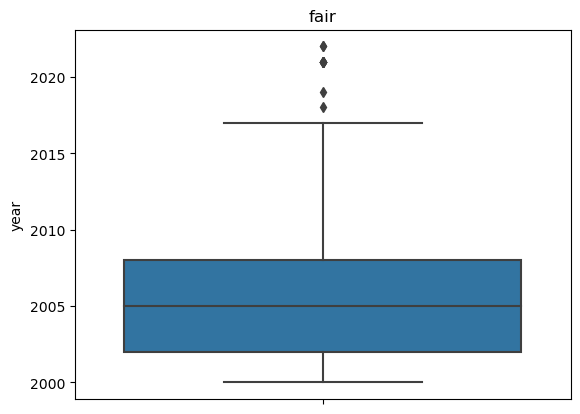

count    1001.000000
mean     2005.492507
std         4.087321
min      2000.000000
25%      2002.000000
50%      2005.000000
75%      2008.000000
max      2022.000000
Name: year, dtype: float64 



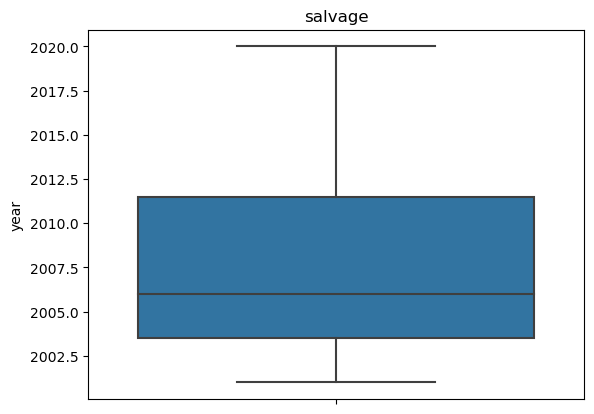

count      99.000000
mean     2007.525253
std         5.263163
min      2001.000000
25%      2003.500000
50%      2006.000000
75%      2011.500000
max      2020.000000
Name: year, dtype: float64 



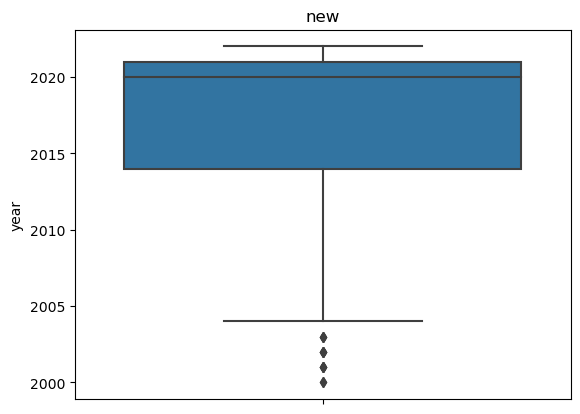

count     309.000000
mean     2016.834951
std         5.497515
min      2000.000000
25%      2014.000000
50%      2020.000000
75%      2021.000000
max      2022.000000
Name: year, dtype: float64 



In [201]:
for cond in df['condition'].unique():
    
    sns.boxplot(y = df['year'][df['condition'] == cond])
    plt.title(cond)
    plt.show()
    print(df['year'][df['condition'] == cond].describe(), '\n')
    
    

In [64]:
# populating the condition with the mode value per each year

In [190]:
years = df['year'].unique()

year_list = []
condition_mode = []
empty_years = []

for year in years:
    mode = df[df['year'] == year]['condition'].mode()
    
    if not mode.empty:
        year_list.append(year)
        condition_mode.append(mode.iloc[0])
    else:
        empty_years.append(year)
print(len(year_list), len(condition_mode), len(empty_years))

23 23 0


In [191]:
# filling nulls
for i in range(min(len(year_list), len(condition_mode))):
    df.loc[(df['condition'].isnull()) & (df['year'] == year_list[i]), 'condition'] = condition_mode[i]

In [192]:
# checking
df['condition'].isnull().sum()

0

# Cylinders

In [77]:
# populating number of cylinders besed on the vehicle type

In [193]:
vehicle_types = df['type'].unique()

types = []
cylinders = []
empty = []

for t in vehicle_types:
    cylinder_mode = df[df['type'] == t]['cylinders'].mode()
    
    if not cylinder_mode.empty:
        types.append(t)
        cylinders.append(cylinder_mode.iloc[0])
    else:
        empty.append(t)
print(len(types), len(cylinders), len(empty))

13 13 0


In [194]:
# filling nulls
for i in range(min(len(types), len(cylinders))):
    df.loc[(df['cylinders'].isnull()) & (df['type'] == types[i]), 'cylinders'] = cylinders[i]

In [195]:
df['cylinders'].isnull().sum()

0

In [196]:
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', 'other',
       '3 cylinders', '5 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

# Lat & long

In [197]:
df.dropna(inplace = True)

In [198]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [199]:
# Saving the results to a csv file
df.to_csv('used_cars_1st_output', index = False)